In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [118]:
df = pd.read_csv('/kaggle/input/heart-diseae/heart-disease.csv')

In [31]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
print(df.duplicated().sum())
df.drop_duplicates(inplace= True)

1


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [95]:
df.shape

(303, 14)

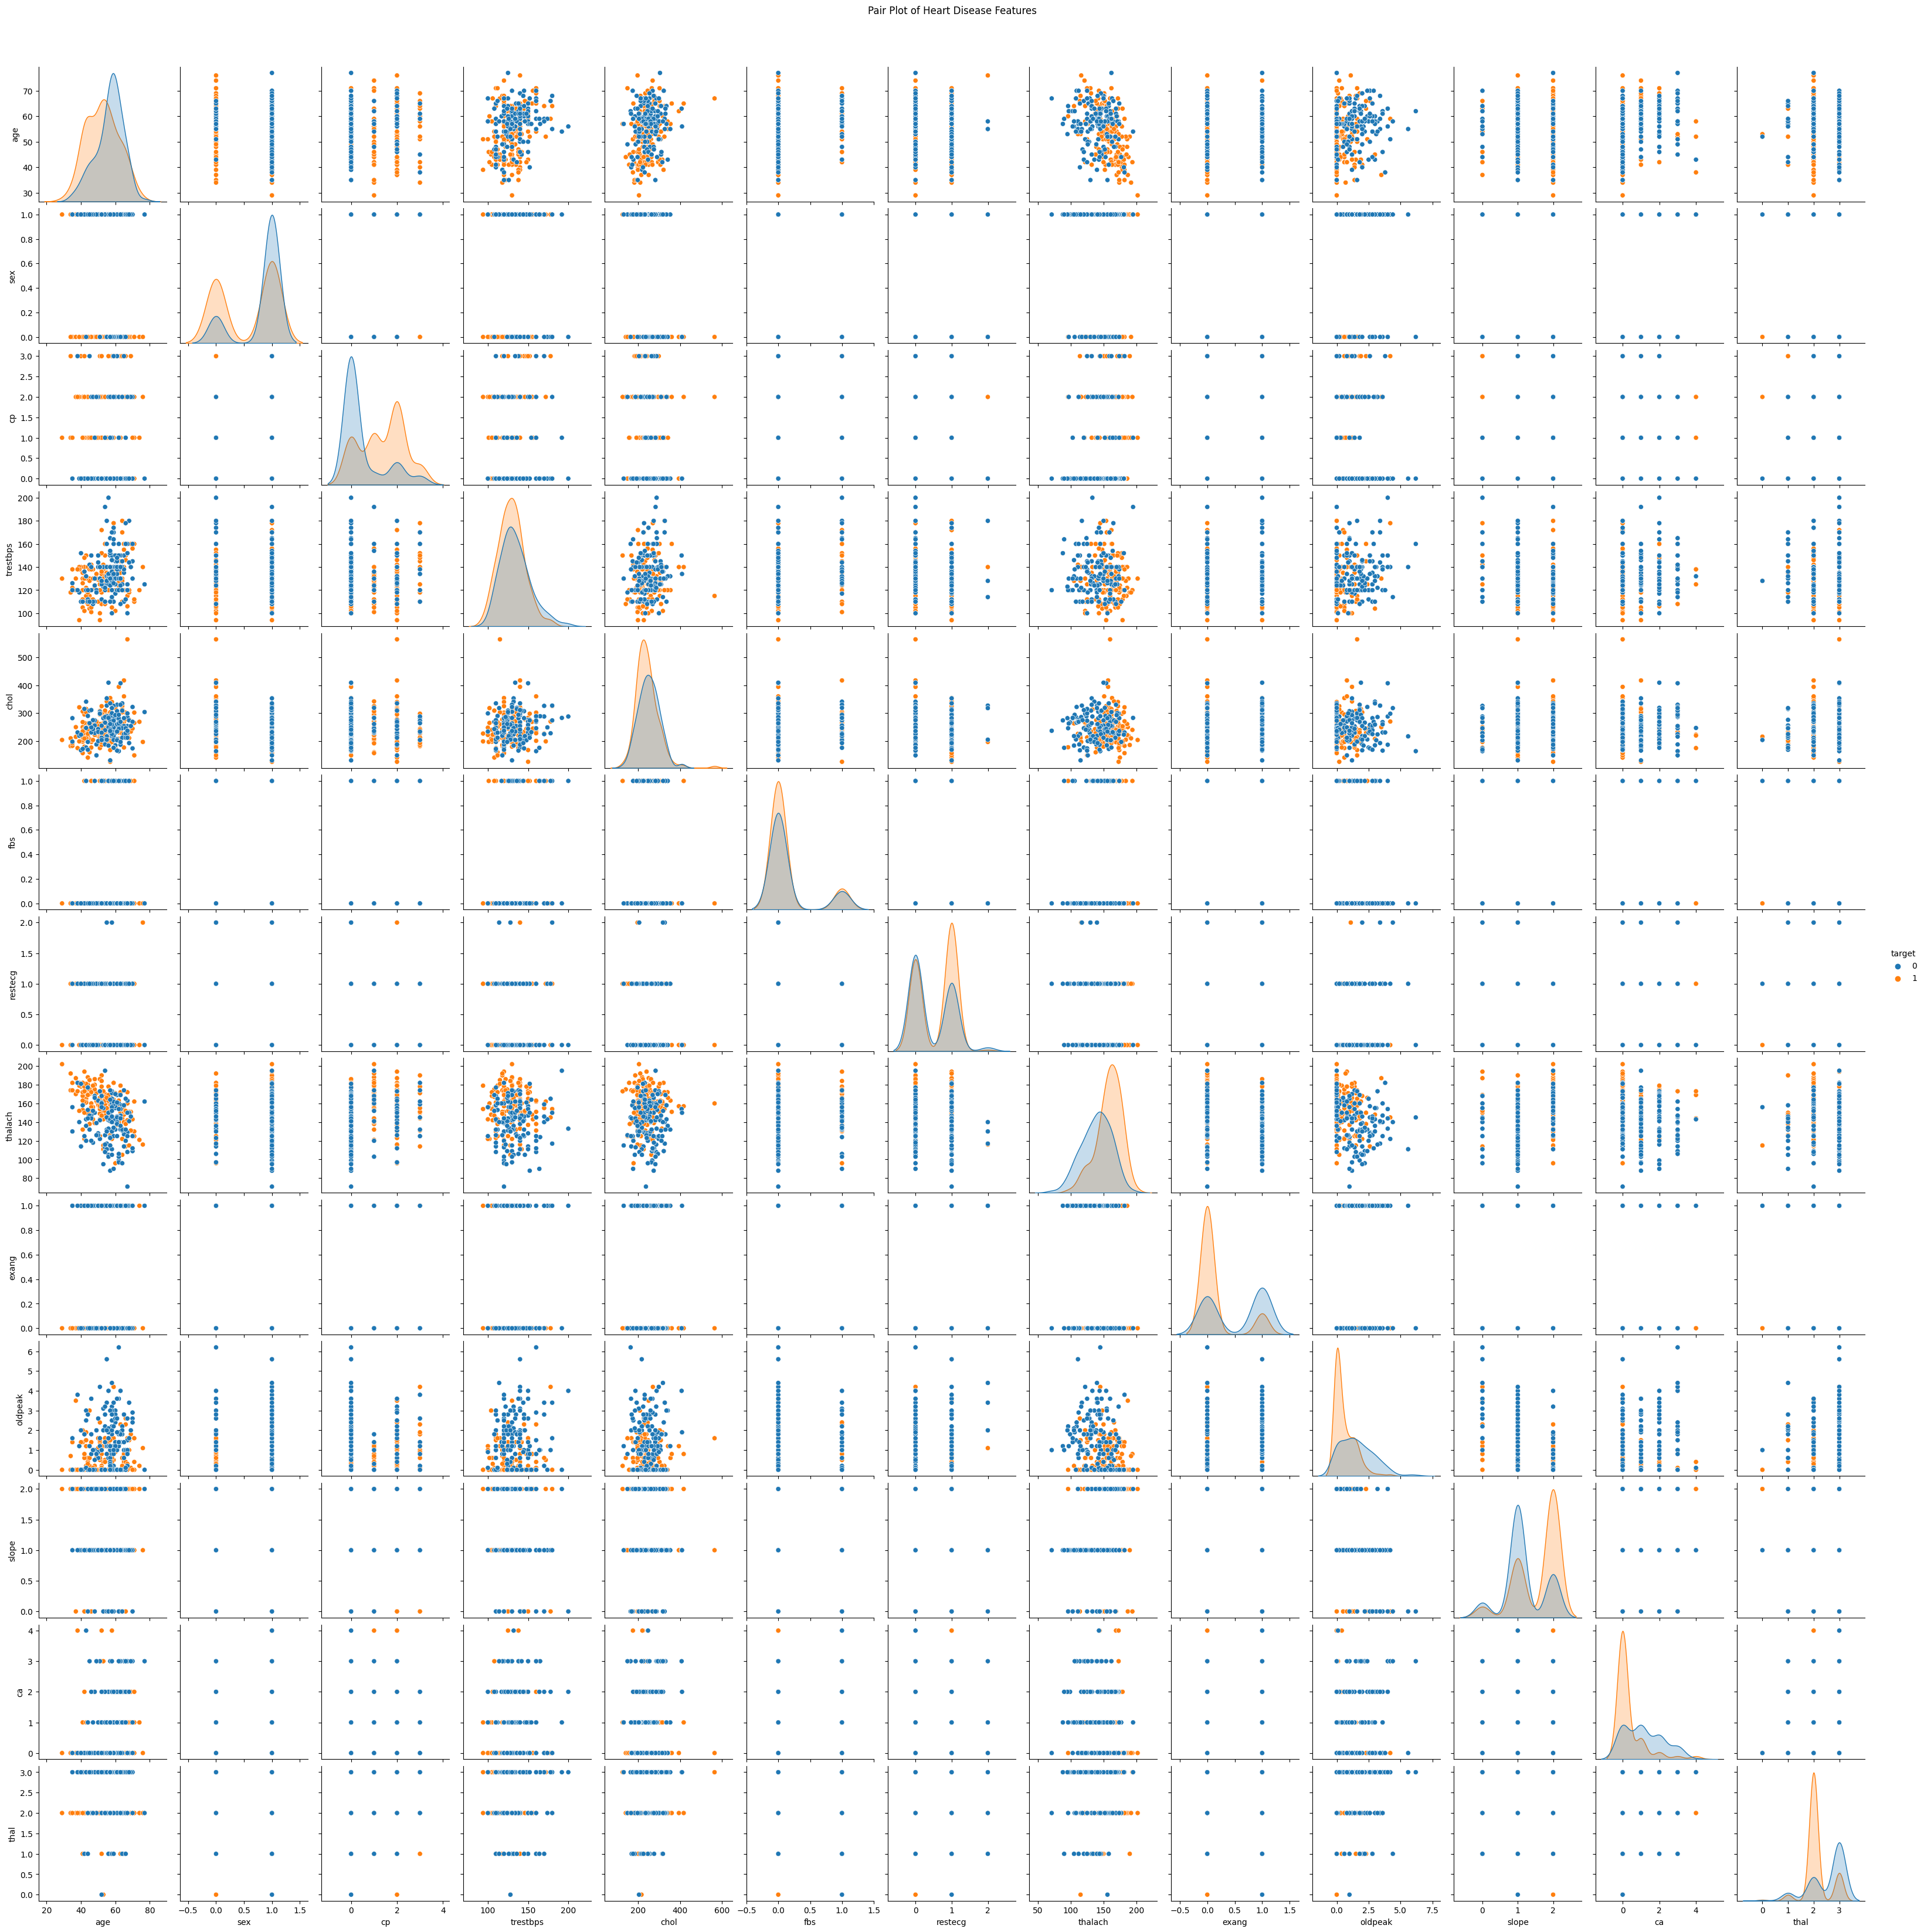

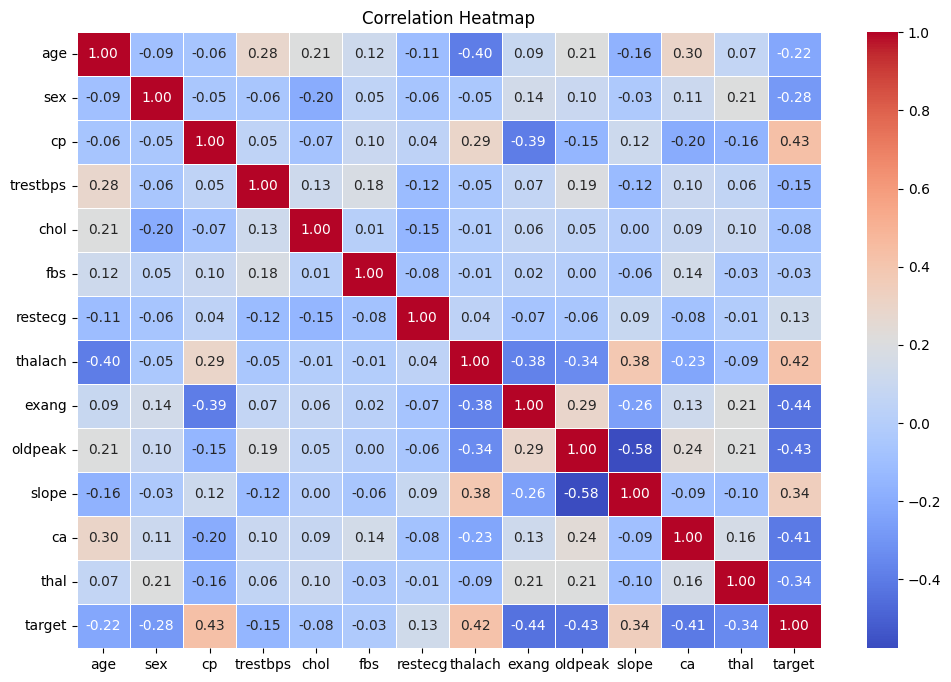

In [36]:


# Pair plot of all features
sns.pairplot(df, diag_kind='kde', hue='target')  # Replace 'target' with the actual target variable name if available
plt.suptitle('Pair Plot of Heart Disease Features', y=1.02)
plt.show()

# Calculate and visualize correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Key Observations

### 1. Correlation with the Target Variable (target):
* **cp (Chest Pain Type)**: Has a strong positive correlation with the target (0.43). This suggests that certain types of chest pain are significantly associated with the presence of heart disease.
* **thalach (Maximum Heart Rate Achieved)**: Shows a positive correlation with the target (0.42), indicating that patients achieving higher heart rates are more likely to have heart disease.
* **exang (Exercise-Induced Angina)**: Has a strong negative correlation with the target (-0.44), suggesting that exercise-induced angina is more common in patients without heart disease.
* **oldpeak (ST Depression)**: Negatively correlated with the target (-0.43), indicating that higher ST depression levels are associated with a lower likelihood of heart disease.
* **slope (Slope of Peak Exercise ST Segment)**: Also negatively correlated with the target (-0.34), suggesting the slope of the ST segment could be an important factor.
* **sex**: Has a negative correlation (-0.28), indicating that males (coded as 1) are less likely to have heart disease in this dataset.
* **ca (Number of Major Vessels Colored by Fluoroscopy)**: Moderately negatively correlated with the target (-0.41), implying that fewer colored vessels are associated with the presence of heart disease.

### 2. High Feature-Feature Correlations:
* **thalach and age**: Correlation of -0.40, suggesting that maximum heart rate achieved tends to decrease with age, which is expected as heart rate capacity generally diminishes with age.
* **oldpeak and exang**: Correlation of 0.38, indicating a moderate association between exercise-induced angina and ST depression, which makes clinical sense.
* **slope and oldpeak**: Correlation of -0.58, showing a strong negative relationship between the slope of the peak exercise ST segment and ST depression.
* **ca and oldpeak**: Correlation of 0.42, suggesting that more vessels colored by fluoroscopy tend to be associated with higher ST depression.

# Feature Engineering

In [119]:
corr_threshold = 0.3

# Keep features with correlation above the threshold with the target
target_corr = correlation_matrix['target'].abs()
strong_features = target_corr[target_corr > corr_threshold].index.tolist()

# Filter dataframe to only include these strong features
df = df[strong_features]

# Check for multicollinearity among the strong features
# Drop one of the features in pairs with correlation above 0.6 (example threshold)
high_corr_pairs = set()
for i in range(len(correlation_matrix.columns)):
     for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
             high_corr_pairs.add(correlation_matrix.columns[i])

# # Drop features involved in high correlation pairs (except target)
features_to_drop = list(high_corr_pairs - {'target'})
df = df.drop(columns=features_to_drop)
df

,cp,thalach,exang,oldpeak,ca,thal,target
0,3,150,0,2.3,0,1,1
1,2,187,0,3.5,0,2,1
2,1,172,0,1.4,0,2,1
3,1,178,0,0.8,0,2,1
4,0,163,1,0.6,0,2,1
...,...,...,...,...,...,...,...
298,0,123,1,0.2,0,3,0
299,3,132,0,1.2,0,3,0
300,0,141,0,3.4,2,3,0
301,0,115,1,1.2,1,3,0


In [121]:
categorical_features = ['cp',]  # Replace with actual categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [123]:
X = df.drop(columns=['target'])
y = df['target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [125]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [126]:
# Define the models and their parameter grids
classifiers = {
    'LogisticRegression': (LogisticRegression(), {
        'classifier__penalty': ['l1', 'l2' ,'elasticnet'],
        'classifier__C': [0.01 ,0.1, 1, 10 , 100 ],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__max_iter':[100, 200, 300]
    }),
    
    'SVM': (SVC(), {
        'classifier__C': [10 ,100],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale' , 'auto'],
        'classifier__degree' : [2,3,4]
    }),
   
    'KNeighbors': (KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
        'classifier__p': [1, 2]
    }),

    'NaiveBayes': (GaussianNB(), {
        # GaussianNB doesn't have hyperparameters typically tuned in the same way
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    })
}


In [127]:
best_estimators = {}
for clf_name, (clf, params) in classifiers.items():
    print(f"Running Grid Search for {clf_name}...")
    
    # Define pipeline with StandardScaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    # Use GridSearchCV to find the best model
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', n_jobs=-1)
    # Fit the model
    grid_search.fit(X_train, y_train)
    # Store the best estimator
    best_estimators[clf_name] = grid_search.best_estimator_
    # Print the best parameters and score for each model
    print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy for {clf_name}: {grid_search.best_score_:.2f}")


Running Grid Search for LogisticRegression...
Best parameters for LogisticRegression: {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best cross-validated accuracy for LogisticRegression: 0.81
Running Grid Search for SVM...
Best parameters for SVM: {'classifier__C': 10, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best cross-validated accuracy for SVM: 0.79
Running Grid Search for KNeighbors...
Best parameters for KNeighbors: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Best cross-validated accuracy for KNeighbors: 0.79
Running Grid Search for NaiveBayes...
Best parameters for NaiveBayes: {'classifier__var_smoothing': 1e-09}
Best cross-validated accuracy for NaiveBayes: 0.78


In [128]:
# Evaluate all best models on the test set
for clf_name, best_model in best_estimators.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nTest Accuracy for {clf_name}: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))



Test Accuracy for LogisticRegression: 0.85
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Test Accuracy for SVM: 0.89
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Test Accuracy for KNeighbors: 0.90
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       